In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-dataset/breast-cancer.csv


![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSYlqAwvmIEBWDbXIHOalcb5lvynmXCSpcJoSdqHdpdpXinc-9M2LMR76OOPY7ghiWx8BA&usqp=CAU)

<h2>Description:</h2>

Breast cancer is the most common cancer amongst women in the world. It accounts for 25% of all cancer cases, and affected over 2.1 Million people in 2015 alone. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenge against its detection is how to classify tumors into <b>malignant (cancerous) or benign(non-cancerous).</b>

<h3>DataSet Link: </h3>

https://www.kaggle.com/yasserh/breast-cancer-dataset

In [2]:
#Import the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the dataset.
data = pd.read_csv("../input/breast-cancer-dataset/breast-cancer.csv")

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#Check for null values.
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
#Check for the duplicates rows.
data.duplicated().any()

False

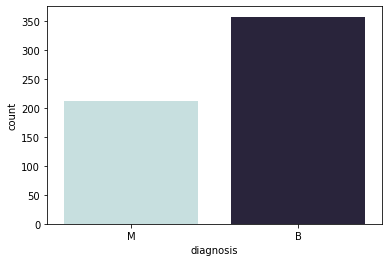

In [9]:
sns.countplot(x = 'diagnosis',data=data,palette ="ch:start=.2,rot=-.3")
plt.show()

**M - Malignant B - Benign**

# Get dummies of categorical variable.(target variable)

In [10]:
dia_dumm = pd.get_dummies(data['diagnosis'])

In [11]:
#Add dummies with main dataframe.
data = pd.concat([data,dia_dumm],axis=1)

In [12]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,B,M
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,1


In [13]:
#Drop the unusefull columns.
data  = data.drop(['id','diagnosis','B'],axis=1)

In [14]:
data.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [15]:
# sns.pairplot(data,hue='M')

In [16]:
data.shape

(569, 31)

# Feature selection

In [17]:
X = data.drop('M',axis=1)
y = data['M']

# correlation

In [18]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
X_train.shape, X_test.shape

((398, 30), (171, 30))

In [20]:
X_train.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.295249,0.998198,0.986838,0.173862,0.514335,0.691099,0.825141,0.130055,-0.334691,...,0.968661,0.261985,0.965167,0.940438,0.124559,0.410200,0.545764,0.739982,0.148186,-0.003661
texture_mean,0.295249,1.000000,0.301988,0.297965,-0.019339,0.227062,0.293874,0.278706,0.072918,-0.081656,...,0.330626,0.908330,0.336144,0.330487,0.098100,0.262653,0.301430,0.274823,0.094799,0.110480
perimeter_mean,0.998198,0.301988,1.000000,0.986457,0.207606,0.560260,0.726532,0.851581,0.162203,-0.290120,...,0.968600,0.269238,0.969497,0.941052,0.154020,0.448652,0.579350,0.765648,0.170639,0.035775
area_mean,0.986838,0.297965,0.986457,1.000000,0.179881,0.504877,0.699187,0.823800,0.130645,-0.305238,...,0.960038,0.256899,0.957628,0.957294,0.126771,0.384823,0.526975,0.713896,0.122938,-0.008668
smoothness_mean,0.173862,-0.019339,0.207606,0.179881,1.000000,0.657633,0.523092,0.547595,0.524757,0.577168,...,0.210894,0.048346,0.232888,0.203238,0.804715,0.472693,0.446719,0.501396,0.390637,0.500584
compactness_mean,0.514335,0.227062,0.560260,0.504877,0.657633,1.000000,0.882086,0.839100,0.593590,0.530379,...,0.543543,0.244771,0.590145,0.515566,0.591149,0.866026,0.832798,0.829554,0.512781,0.677353
concavity_mean,0.691099,0.293874,0.726532,0.699187,0.523092,0.882086,1.000000,0.929651,0.487250,0.305407,...,0.697692,0.294430,0.731906,0.684334,0.461758,0.733864,0.880082,0.860910,0.391928,0.491046
concave points_mean,0.825141,0.278706,0.851581,0.823800,0.547595,0.839100,0.929651,1.000000,0.445337,0.142726,...,0.829749,0.283116,0.852753,0.807316,0.456557,0.665314,0.770467,0.907160,0.371893,0.359519
symmetry_mean,0.130055,0.072918,0.162203,0.130645,0.524757,0.593590,0.487250,0.445337,1.000000,0.465672,...,0.161643,0.083067,0.190340,0.151767,0.409629,0.461318,0.425195,0.421450,0.701085,0.432600
fractal_dimension_mean,-0.334691,-0.081656,-0.290120,-0.305238,0.577168,0.530379,0.305407,0.142726,0.465672,1.000000,...,-0.280000,-0.041873,-0.239676,-0.258208,0.531849,0.443050,0.327967,0.161519,0.340958,0.766143


# Feature Selection

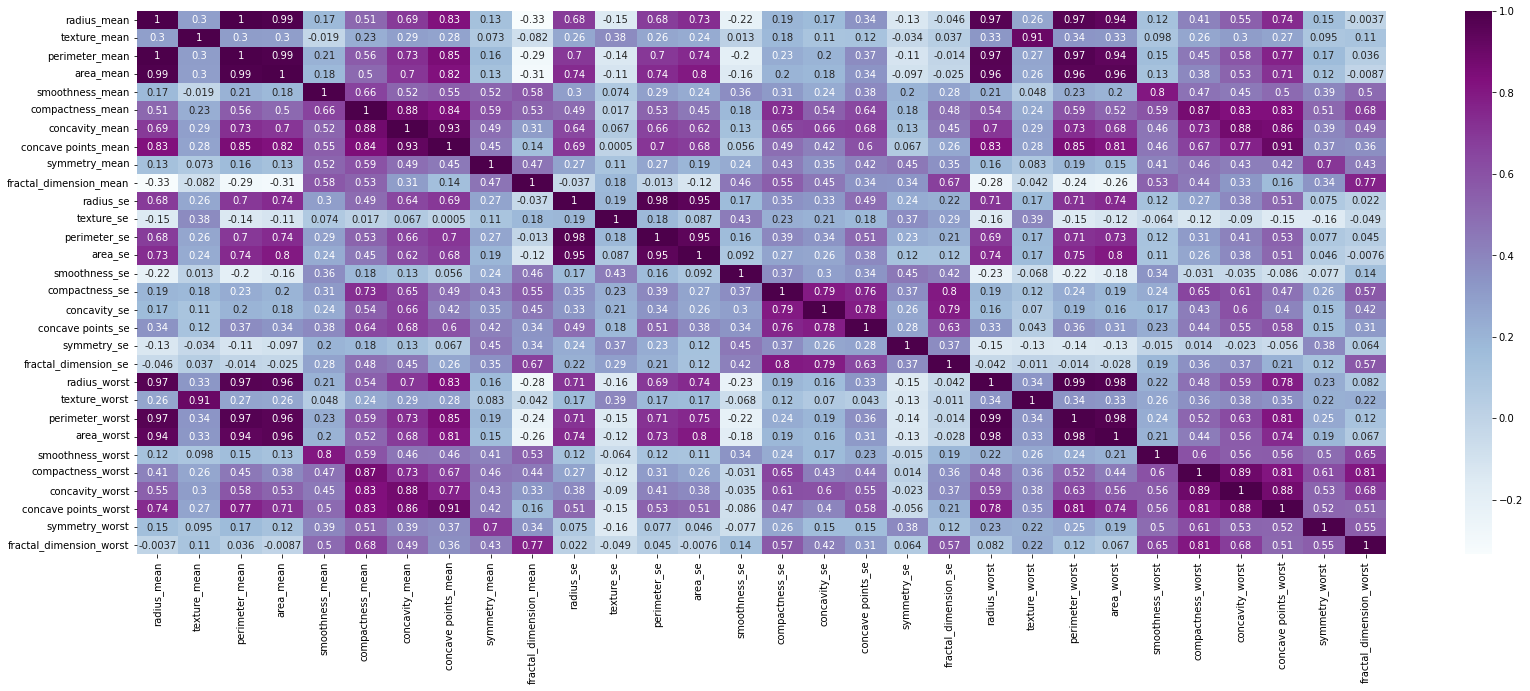

In [21]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(28,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.BuPu)
plt.show()

In [22]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [23]:
corr_features = correlation(X_train, 0.8)
len(set(corr_features))

15

In [24]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'compactness_worst',
 'concave points_mean',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'fractal_dimension_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'smoothness_worst',
 'texture_worst'}

In [25]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [26]:
X_train.shape,X_test.shape


((398, 15), (171, 15))

# Feature Scaling

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [29]:
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0]


In [30]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.9415204678362573


# SVM

In [31]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# Predict the tset set result

In [32]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[102   6]
 [  2  61]]


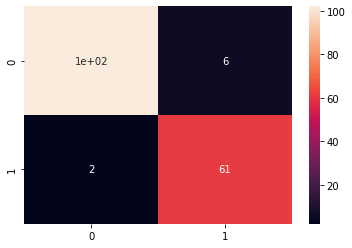

In [33]:
sns.heatmap(cm,annot=True)
plt.show()

In [34]:
acc2 = accuracy_score(y_test, y_pred)

In [35]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.9532163742690059


# Training the K-NN model on the Training set

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = classifier.predict(X_test)

# KNN confusion matrix

In [38]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[104   4]
 [  9  54]]


<AxesSubplot:>

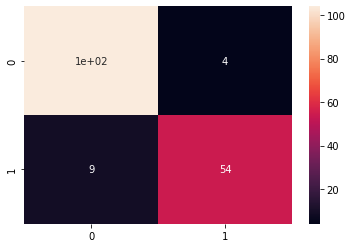

In [39]:
sns.heatmap(cm,annot=True)

In [40]:
from sklearn.metrics import  accuracy_score
acc3 = accuracy_score(y_test, y_pred)

In [41]:
print(f"Accuracy score: {acc3}")

Accuracy score: 0.9239766081871345


# Training the Naive Bayes on the Training set

In [42]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[101   7]
 [  8  55]]


In [44]:
acc4 = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc4}")

Accuracy score : 0.9122807017543859


# Training Decision Tree Classification on Train set

In [45]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [46]:
y_pred = classifier.predict(X_test)

In [47]:
acc5 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc5}")

Accuracy score: 0.8830409356725146


# XG Boost

In [48]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:50:37] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# XG Boost Classifier confusion matrix

In [49]:
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc7 = accuracy_score(y_test, y_pred)

[[101   7]
 [  4  59]]


In [50]:
print(f"By XG Boost classifier Acc: {acc7}")

By XG Boost classifier Acc: 0.935672514619883


# Training CatBoost on the Training set

In [51]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier()
classifier.fit(X_train, y_train)

Learning rate set to 0.006952
0:	learn: 0.6872257	total: 52.3ms	remaining: 52.3s
1:	learn: 0.6786744	total: 54.4ms	remaining: 27.2s
2:	learn: 0.6705192	total: 56.4ms	remaining: 18.8s
3:	learn: 0.6620977	total: 58.4ms	remaining: 14.6s
4:	learn: 0.6532980	total: 60.5ms	remaining: 12s
5:	learn: 0.6468802	total: 62.4ms	remaining: 10.3s
6:	learn: 0.6393615	total: 64.3ms	remaining: 9.13s
7:	learn: 0.6311684	total: 66.3ms	remaining: 8.22s
8:	learn: 0.6234231	total: 68.3ms	remaining: 7.52s
9:	learn: 0.6163330	total: 70.3ms	remaining: 6.96s
10:	learn: 0.6089128	total: 72.4ms	remaining: 6.51s
11:	learn: 0.6015497	total: 74.5ms	remaining: 6.13s
12:	learn: 0.5948480	total: 76.6ms	remaining: 5.82s
13:	learn: 0.5898760	total: 78.7ms	remaining: 5.54s
14:	learn: 0.5831610	total: 80.7ms	remaining: 5.3s
15:	learn: 0.5758292	total: 82.8ms	remaining: 5.09s
16:	learn: 0.5685212	total: 84.9ms	remaining: 4.91s
17:	learn: 0.5618828	total: 86.9ms	remaining: 4.74s
18:	learn: 0.5552386	total: 89ms	remaining: 4.5

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc8 = accuracy_score(y_test, y_pred)

[[103   5]
 [  4  59]]


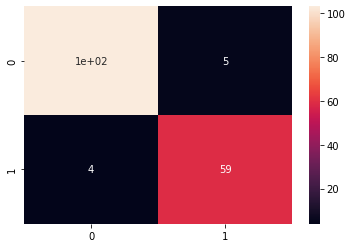

In [53]:
sns.heatmap(cm,annot=True)
plt.show()

In [54]:
print(acc8)

0.9473684210526315


# Training the Random Forest Classification model on the Training set

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [56]:
y_pred = classifier.predict(X_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc6 = accuracy_score(y_test, y_pred)

[[102   6]
 [  7  56]]


In [58]:
print(acc6)

0.9239766081871345


# Create visualization of all models.

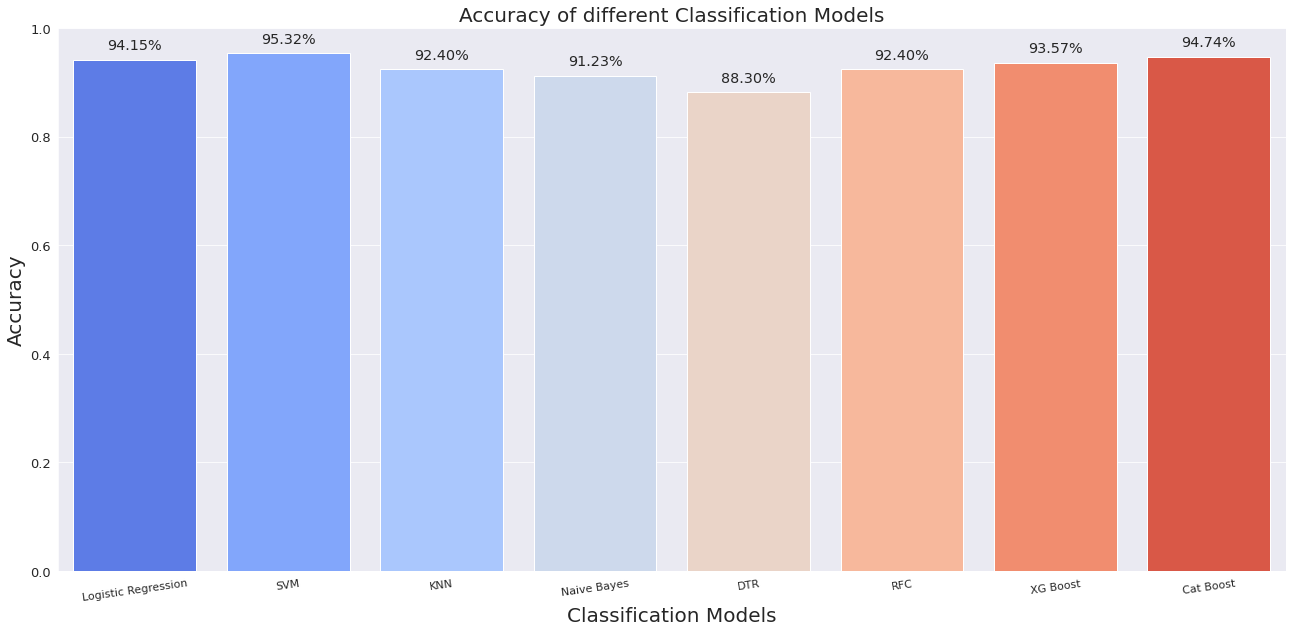

In [59]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append(acc4)
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")
mylist.append(acc6)
mylist2.append("RFC")
mylist.append(acc7)
mylist2.append("XG Boost")
mylist.append(acc8)
mylist2.append("Cat Boost")
plt.rcParams['figure.figsize']=22,10
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "coolwarm", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Applying k-Fold Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 93.21 %
Standard Deviation: 3.38 %


**If you have any queries, please let me know!**

![](https://optinmonster.com/wp-content/uploads/2016/10/Anatomy-of-the-Perfect-Thank-You-Page.png)